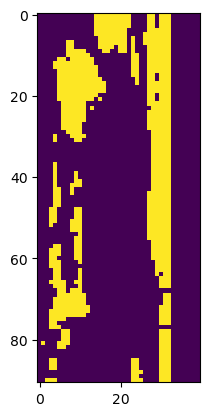

In [20]:
import numpy as np
import matplotlib.pyplot as plt

sample_chip = np.load("/explore/nobackup/projects/pix4dcloud/szhang16/abiChips/GOES-16/2019-261-71337_3568-3007-10850.npz", allow_pickle=True)
chip_data = sample_chip['data'].item()

cloudmask = chip_data['Cloud_mask_binary']
latitude = chip_data['Latitude'][45] # Get the middle latitude

plt.imshow(cloudmask)

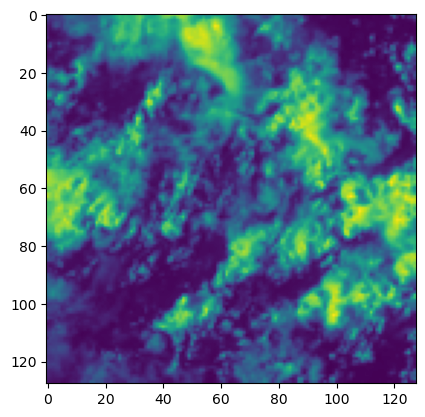

In [24]:
plt.imshow(sample_chip['chip'][:, :, 0])

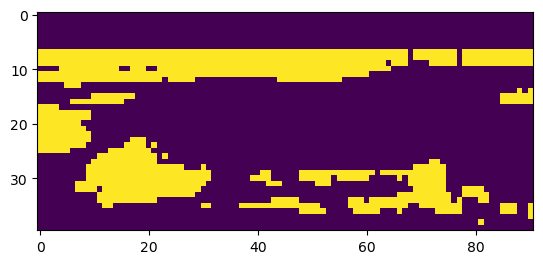

In [21]:
cloudmask = np.transpose(cloudmask, (1, 0))
cloudmask = cloudmask[::-1, ...]

plt.imshow(cloudmask)

In [7]:
cutoff = abs(np.cos(latitude/1.5))
HIGHB = cutoff * 10
MHIGHB = cutoff * 7
MLOWB = 2.5

In [186]:
# Convert to corresponding indices
HIGHB = HIGHB * 2
MHIGHB = MHIGHB * 2
MLOWB = MLOWB * 2

In [188]:
def classifyPixel(i: int):
    if i >= HIGHB:
        return 1
    if i >= MHIGHB:
        return 2
    if i >= MLOWB:
        return 3
    return 4